# House Prices - Advanced Regression Techniques
(Preços de casas - Técnicas Avançadas de Regressão)

- Vamos utilizar o [dataset disponível no Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)
    - É um dataset de **competição**
    - Temos uma base com a **descrição de cada uma das colunas (data_description.txt)**

In [2]:
# Importando as bases
import pandas as pd
treino = pd.read_csv('train_3_1.csv')
teste = pd.read_csv('test_3_1.csv')

In [3]:
# Verificando o formato da base
treino.shape

(1460, 85)

In [4]:
# Verificando o tipo de dados nas colunas
treino.dtypes.value_counts()

int64      42
object     35
float64     8
Name: count, dtype: int64

- Precisamos garantir que não vamos ter colunas de texto.

In [6]:
# Selecionando apenas as colunas numéricas
cols_num = treino.select_dtypes('number')
cols_num

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,GarageType_-1,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_infrequent_sklearn
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0.0,0.0,0.0,1.0,0.0,0,1,0,0,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0.0,0.0,0.0,1.0,0.0,0,1,0,0,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0.0,0.0,0.0,1.0,0.0,0,1,0,0,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0.0,0.0,0.0,1.0,0.0,0,0,0,1,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0.0,0.0,0.0,1.0,0.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0.0,0.0,0.0,1.0,0.0,0,1,0,0,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0.0,0.0,0.0,1.0,0.0,0,1,0,0,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0.0,0.0,0.0,1.0,0.0,0,1,0,0,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0.0,0.0,0.0,1.0,0.0,0,1,0,0,0


In [7]:
# E criar uma nova base com esses valores
treino = cols_num
treino.shape

(1460, 50)

In [8]:
# Mantendo também apenas as colunas numéricas para a base de teste (que não possui SalePrice)
teste = teste.select_dtypes('number')
teste.shape

(1459, 49)

## Criando nosso modelo

- **Vamos separar em treino e validação:**
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [11]:
# Selecionando X e y
X = treino.drop('SalePrice', axis=1)
y = treino.SalePrice

In [12]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split

In [13]:
# Separando essa base em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

- **Vamos então adicionar os algoritmos nessa análise:**
    - RandomForestRegressor
        - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor
    - XGBoost
        - https://xgboost.readthedocs.io/en/stable/index.html

- E vamos usar o **grid_search** para estimar os melhores parâmetros
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
# Para o RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor(random_state=42)
parametros_rf = {
    'n_estimators': [100, 200, 500, 800, 1000],
    'criterion': ['squared_error','poisson'],
    'max_depth': [10, 20, 30, 40, 50],
    'max_features': ['auto', 'sqrt']
}

In [18]:
# Fazendo o grid search
from sklearn.model_selection import GridSearchCV
grid_search_rf = GridSearchCV(estimator=reg_rf,param_grid=parametros_rf,scoring='neg_mean_squared_error')
grid_search_rf = grid_search_rf.fit(X_train, y_train)

In [19]:
# Verificando os melhores parâmetros para o RandomForest
grid_search_rf.best_params_

{'criterion': 'poisson',
 'max_depth': 30,
 'max_features': 'sqrt',
 'n_estimators': 1000}

In [20]:
# E o melhor score
grid_search_rf.best_score_*(-1)

908443856.4984334

In [21]:
# Para o XGBoost
from xgboost import XGBRegressor
reg_xgb = XGBRegressor(random_state=42)
parametros_xgb = {
    'learning_rate': [0.3, 0.03, 0.1],
    'max_depth': [5, 8, 10, 20, 30, 40, 50],
    'n_estimators': [100, 500, 1000],
    'colsample_bytree': [0.7, 1]
}

In [22]:
# Também fazendo o grid search
grid_search_xgb = GridSearchCV(estimator=reg_xgb,param_grid=parametros_xgb,scoring='neg_mean_squared_error')
grid_search_xgb = grid_search_xgb.fit(X_train, y_train)

In [23]:
# Verificando os melhores parâmetros
grid_search_xgb.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 100}

In [24]:
# E o melhor score
grid_search_xgb.best_score_*(-1)

903869257.5375307

- **Selecionando o melhor estimador para os dois algoritmos**

In [26]:
# Para o Random Forest
reg_rf_best = grid_search_rf.best_estimator_

In [27]:
# Para o XGBoost
reg_xgb_best = grid_search_xgb.best_estimator_

- **Fazendo a previsão no X_val**

In [29]:
# RandomForest
y_pred_rf = reg_rf_best.predict(X_val)

In [30]:
# XGBoost
y_pred_xgb = reg_xgb_best.predict(X_val)

- **E avaliar esses dados, utilizando tanto o erro absoluto quanto o quadrático:**
    - Erro médio absoluto
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
    - Erro quadrático médio
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [32]:
# Importando o erro médio absoluto
from sklearn.metrics import mean_absolute_error

In [33]:
# E o erro quadrático médio
from sklearn.metrics import mean_squared_error

In [34]:
# do Random Forest
print(mean_absolute_error(y_val, y_pred_rf))
print(mean_squared_error(y_val, y_pred_rf))

17117.091819502075
1037051614.3686688


In [35]:
# e do XGBoost
print(mean_absolute_error(y_val, y_pred_xgb))
print(mean_squared_error(y_val, y_pred_xgb))

17378.86533973029
1057275922.3176669


- **Podemos plotar visualmente a relação do y_val com as previsões feitas:**
    - Para isso vamos utilizar o matplotlib
        - https://matplotlib.org/

In [37]:
# Importando o matplotlib
import matplotlib.pyplot as plt

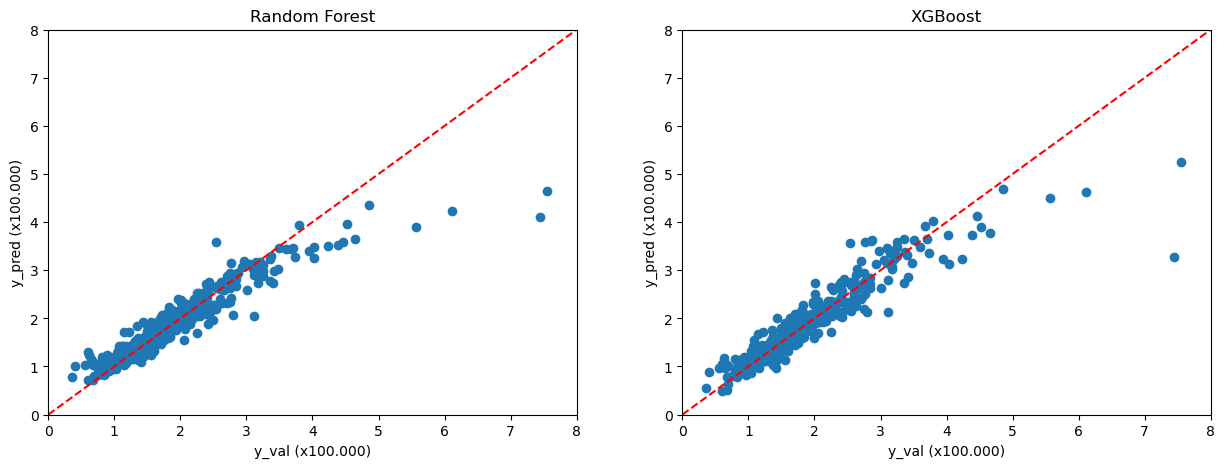

In [38]:
# Criando esse gráfico
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))

ax[0].scatter(y_val/100000, y_pred_rf/100000)
ax[0].plot([0,8], [0,8], '--r')
ax[1].scatter(y_val/100000, y_pred_xgb/100000)
ax[1].plot([0,8], [0,8], '--r')

ax[0].set(xlim=(0, 8), ylim=(0, 8))
ax[0].set_xlabel('y_val (x100.000)')
ax[0].set_ylabel('y_pred (x100.000)')
ax[0].set_title('Random Forest')
ax[1].set(xlim=(0, 8), ylim=(0, 8))
ax[1].set_xlabel('y_val (x100.000)')
ax[1].set_ylabel('y_pred (x100.000)')
ax[1].set_title('XGBoost')

plt.show()

## Fazendo a previsão para a base de teste da competição.

In [40]:
# Visualizando a base
teste.head(3)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,GarageType_-1,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_infrequent_sklearn
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0.0,0.0,1.0,0.0,0.0,0,1,0,0,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0.0,0.0,0.0,1.0,0.0,0,1,0,0,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0.0,0.0,0.0,1.0,0.0,0,1,0,0,0


- Vamos fazer a previsão com o Random Forest

In [42]:
# Vamos usar o Random Forest para fazer a previsão
y_pred = reg_rf_best.predict(teste)

In [43]:
# Podemos adicionar essa coluna de previsão na nossa base
teste['SalePrice'] = y_pred

In [44]:
# E extrair somente o Id e o SalePrice
base_kaggle = teste[['Id','SalePrice']]
base_kaggle.head(3)

,Id,SalePrice
0,1461,124209.844
1,1462,154615.060
2,1463,186980.521


In [45]:
# Podemos então exportar essa base
base_kaggle.to_csv('resultado5_1_rf.csv',index=False)

- Podemos também fazer a previsão com o XGBoost

In [47]:
# Visualizando novamente a base de teste
teste.head(3)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,GarageType_-1,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_infrequent_sklearn,SalePrice
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0.0,1.0,0.0,0.0,0,1,0,0,0,124209.844
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0.0,0.0,1.0,0.0,0,1,0,0,0,154615.060
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0.0,0.0,1.0,0.0,0,1,0,0,0,186980.521


In [48]:
# Retirando a coluna SalePrice
teste = teste.drop('SalePrice', axis=1)

In [49]:
# Usando o XGBoost para fazer a regressão
y_pred = reg_xgb_best.predict(teste)

In [50]:
# Podemos novamente adicionar a coluna na base
teste['SalePrice'] = y_pred

In [51]:
# E extrair somente o Id e o SalePrice
base_kaggle = teste[['Id','SalePrice']]
base_kaggle.head(3)

,Id,SalePrice
0,1461,120369.296875
1,1462,155539.953125
2,1463,186881.500000


In [52]:
# E exportar a nova base
base_kaggle.to_csv('resultado5_1_xgb.csv',index=False)